In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

wine_data = load_wine()
df = pd.DataFrame(data=wine_data['data'],columns=wine_data['feature_names'])
df['class_type']=wine_data['target']

print(wine_data.DESCR)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

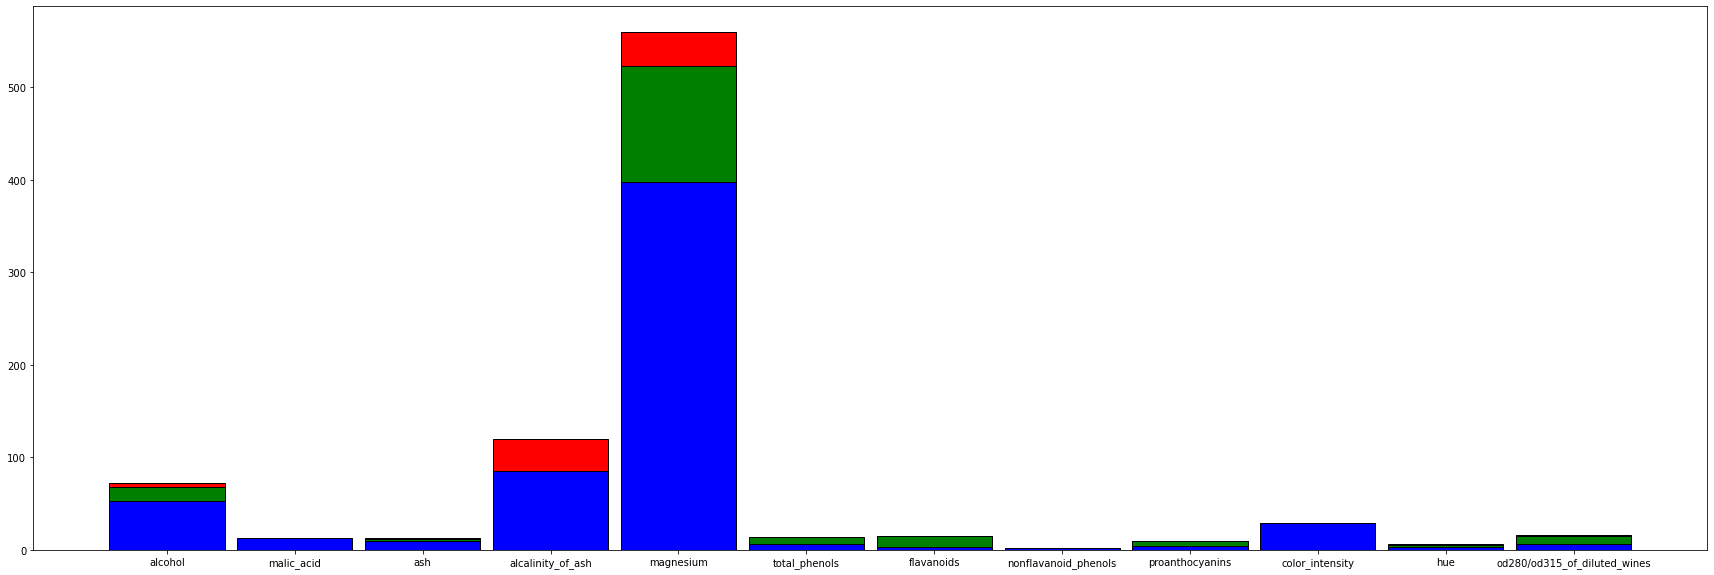

In [3]:
col_count = 12
x = df.columns[0:col_count]
data_class = [np.zeros(col_count),np.zeros(col_count),np.zeros(col_count)]
for i in range(len(df.values)):
    data_class[int(df.values[i][13])] += df.values[i][0:col_count]

plt.figure(figsize = (30, 10))
plt.bar(x,data_class[1]/len(data_class[1]), color='red', edgecolor='black',width=0.9)
plt.bar(x,data_class[0]/len(data_class[0]), color='green', edgecolor='black',width=0.9,alpha=1)
plt.bar(x,data_class[2]/len(data_class[2]), color='blue', edgecolor='black',width=0.9,alpha=1)
plt.show()

# class red highest in:
# 	alchol
# 	alcalinity of ash
# 	magnesium
# 	proathocyanins
# 	hue
#   non flavonoids
# 	0d280/315 of diluated vines
#   ash
	
# class green highest in:
# 	flavanoids
# 	total phenols
# 	proline
	
# class green is highest in
# 	color intensity
#   Malic Acid

# the 3 classes are grouped by the bases of chemical attributes


In [4]:
#Split arrays or matrices into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(wine_data.data, wine_data.target, test_size=0.30)

              precision    recall  f1-score   support

     class 0       1.00      0.94      0.97        18
     class 1       0.90      1.00      0.95        19
     class 2       1.00      0.94      0.97        17

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

sensitivity: [0.94444444 1.         0.94117647]
specificity: [0.94117647 1.         0.94444444]


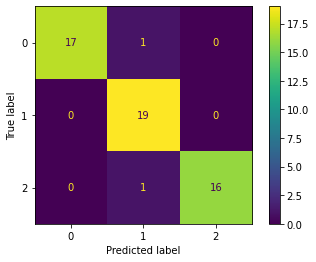

In [112]:
#for smaller datasets solver should be liblinear
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

sensitivity = metrics.recall_score(y_test,y_pred,average=None) 
specificity = metrics.recall_score(y_test,y_pred,average=None,labels=['2','1','0']) 

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test,y_pred, target_names=target_names))
print(f'sensitivity: {sensitivity}\nspecificity: {specificity}')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        18
     class 1       0.95      1.00      0.97        19
     class 2       1.00      0.94      0.97        17

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

sensitivity: [1.         1.         0.94117647]
specificity: [0.94117647 1.         1.        ]


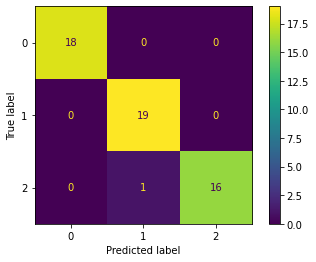

In [113]:
# rf = RandomForestClassifier()
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

sensitivity = metrics.recall_score(y_test,y_pred,average=None) 
specificity = metrics.recall_score(y_test,y_pred,average=None,labels=['2','1','0']) 

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test,y_pred, target_names=target_names))
print(f'sensitivity: {sensitivity}\nspecificity: {specificity}')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

              precision    recall  f1-score   support

     class 0       0.94      0.94      0.94        18
     class 1       0.56      0.79      0.65        19
     class 2       0.44      0.24      0.31        17

    accuracy                           0.67        54
   macro avg       0.65      0.66      0.63        54
weighted avg       0.65      0.67      0.64        54

sensitivity: [0.94444444 0.78947368 0.23529412]
specificity: [0.23529412 0.78947368 0.94444444]


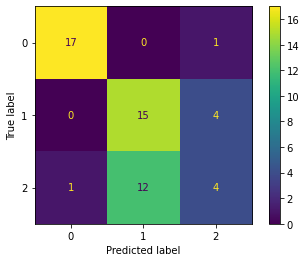

In [123]:
#creates KNN Classifier object and scans 50 nearest neighbours
model = KNeighborsClassifier(n_neighbors=50)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

sensitivity = metrics.recall_score(y_test,y_pred,average=None) 
specificity = metrics.recall_score(y_test,y_pred,average=None,labels=['2','1','0']) 

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test,y_pred, target_names=target_names))
print(f'sensitivity: {sensitivity}\nspecificity: {specificity}')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()